## Face Mask detector
### using CNN (MINOR PROJECT)
* by **Shivanshu Singh**
* Email **ss92@iitbbs.ac.in**

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [5]:
import tensorflow as tf
import keras

In [6]:
# now importing the layer and model nodules in Keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

In [7]:
# lets build our model
# in this model i have used 2 Convolution Layers and Three Dense layers
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(32, activation='relu'),
    Dropout(rate=0.01),
    Dense(32, activation='relu'),
    Dropout(rate=0.01),
    Dense(1, activation = 'sigmoid')
])

In [8]:
# lets see our models Summary:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 41472)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1327136   
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)               

In [9]:
# Compiling the model
# the OPTIMIZER used is --> adam
# the LOSS used is --> binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [10]:
# lets generate the training data by the use of Keras inbuild preprocessing
from keras.preprocessing.image import ImageDataGenerator

In [12]:
# creating the instance of ImageDataGenerator as Generator
generator = ImageDataGenerator(rescale=1./255)

# Creating Training data Generator
train_generator = generator.flow_from_directory(
'/content/gdrive/My Drive/Verzeo  Artificial Intelligence Course/9. Minor Project/dataset',
target_size=(150,150),
class_mode='binary',
batch_size=32
)

Found 1376 images belonging to 2 classes.


In [14]:
# training our model
model.fit_generator(train_generator,
                   steps_per_epoch=1376/32,
                   epochs=5)

Epoch 1/5
43/43 [==============================] - 98s 2s/step - loss: 0.1104 - accuracy: 0.9557
Epoch 2/5
43/43 [==============================] - 8s 191ms/step - loss: 0.0631 - accuracy: 0.9797
Epoch 3/5
43/43 [==============================] - 8s 190ms/step - loss: 0.0332 - accuracy: 0.9884
Epoch 4/5
43/43 [==============================] - 8s 190ms/step - loss: 0.0182 - accuracy: 0.9942
Epoch 5/5
43/43 [==============================] - 8s 189ms/step - loss: 0.0148 - accuracy: 0.9949


In [15]:
# lets predict our model 
# in training it seemed to be good enough with training accuracy close to 1
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
import PIL
%matplotlib inline

In [16]:
test_image_1 = image.load_img('/content/gdrive/My Drive/mask.jpg', target_size=(150,150))
test_image_2 = image.load_img('/content/gdrive/My Drive/person.jpg', target_size=(150,150))

### TEST - 1

the test cases are not from the training set but completely different and taken from net

with mask


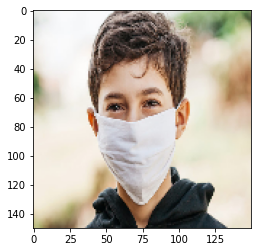

In [17]:
plt.imshow(test_image_1)
tested_image = image.img_to_array(test_image_1)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
if output[0][0] == 0:
  prediction = 'with mask'
  print(prediction )
else:
  prediction = 'no mask'
  print(prediction )

### TEST - 2

no mask


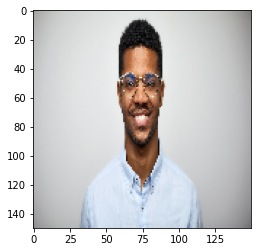

In [18]:
plt.imshow(test_image_2)
tested_image = image.img_to_array(test_image_2)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
if output[0][0] == 0:
  prediction = 'with mask'
  print(prediction )
else:
  prediction = 'no mask'
  print(prediction )

### TEST - 3

no mask


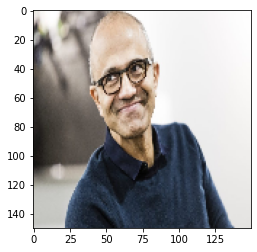

In [20]:
test_image_3 = image.load_img('/content/gdrive/My Drive/Satya.jpg', target_size=(150,150))
plt.imshow(test_image_3)
tested_image = image.img_to_array(test_image_3)
tested_image = np.expand_dims(tested_image,axis = 0)
output = model.predict(tested_image)
if output[0][0] == 0:
  prediction = 'with mask'
  print(prediction )
else:
  prediction = 'no mask'
  print(prediction )

### all the three predictions made were correct !!!